# scRNA-seq analysis of human in vitro differentiation data

Data described in Veres et al., Nature, 2019, https://doi.org/10.1038/s41586-019-1168-5  
Processed and annotated data was downloaded from GEO with accession number `GSE114412`.  
Data contains cells from Stage 5: `GSE114412_Stage_5.all.processed_counts.tsv.gz`

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix
import xlsxwriter
from matplotlib import rcParams
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.0 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.set_figure_params(vector_friendly=True, color_map='viridis', dpi_save=300, transparent=True, frameon=False)

In [3]:
sc.settings.figdir='./figures'

## Load data

**Note:** An h5ad file of the normalized count matrix was generated from the downloaded tsv file `GSE114412_Stage_5.all.processed_counts.tsv.gz`. tSNE coordinates and cluster annotation was obtained from the associated metadata file `GSE114412_Stage_5.all.cell_metadata.tsv.gz`

In [6]:
veres = sc.read('./data/adata_s5_norm.h5ad')

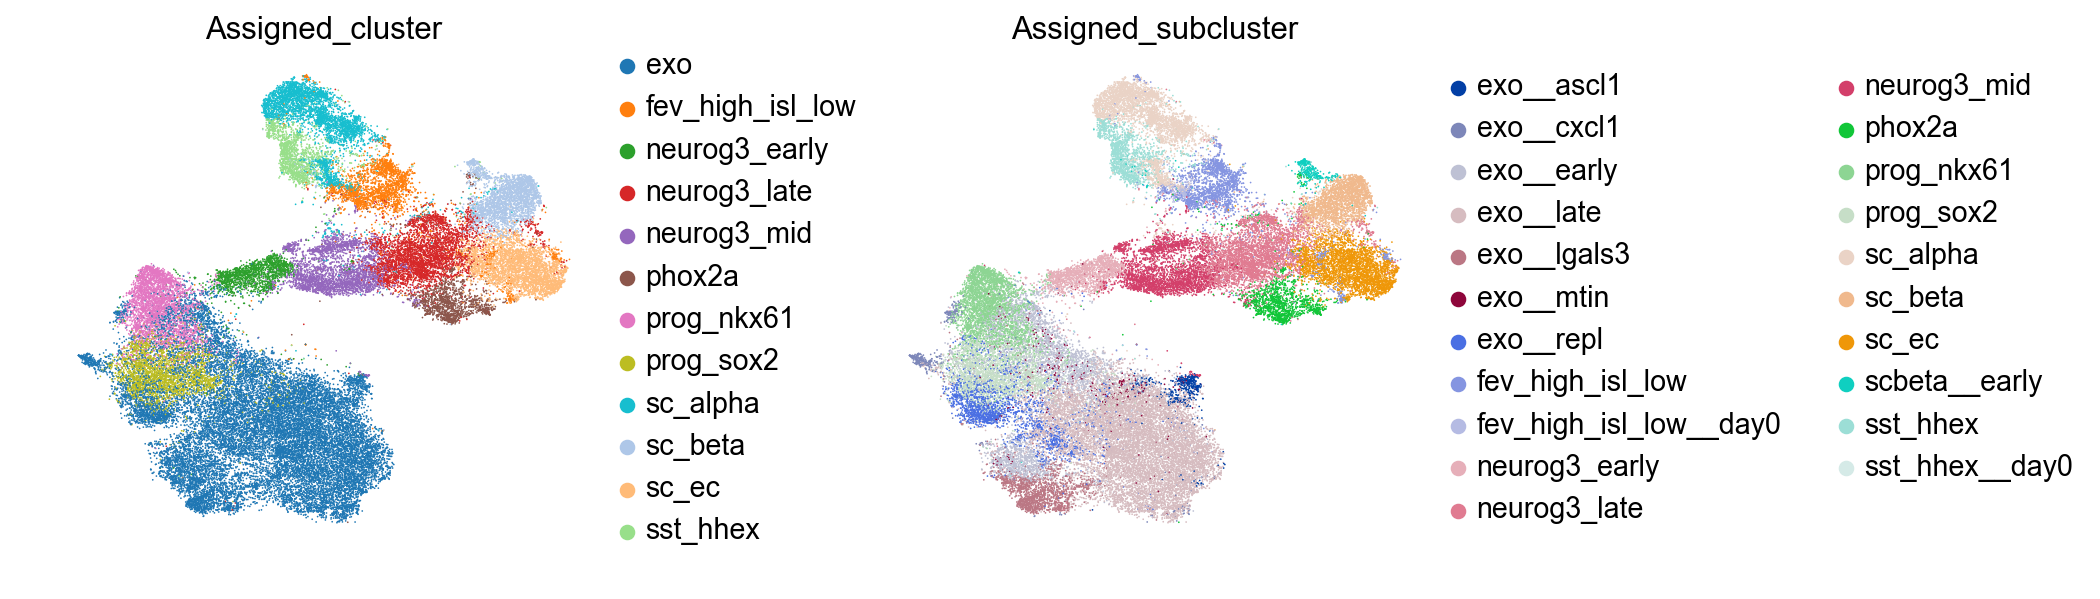

In [7]:
sc.pl.tsne(veres, color=['Assigned_cluster', 'Assigned_subcluster'], wspace=0.4)

In [8]:
# subset to endocrine clusters of interest
veres_sub = veres[np.isin(veres.obs['Assigned_cluster'],['neurog3_early', 'neurog3_mid', 'neurog3_late', 
                                                         'prog_nkx61', 'fev_high_isl_low', 'sc_alpha', 'sc_beta'])].copy()

In [9]:
# order and rename clusters categories
veres_sub.obs['cluster'] = veres_sub.obs['Assigned_cluster'].cat.reorder_categories(
    ['prog_nkx61', 'neurog3_early', 'neurog3_mid', 'neurog3_late', 'fev_high_isl_low', 'sc_beta', 'sc_alpha']
)
veres_sub.obs['cluster'] = veres_sub.obs['cluster'].cat.rename_categories(
    ['NKX6-1 progenitor', 'Early endo. ind.', 'Mid endo. ind.','Late endo. ind.','$FEV^{high}ISL1^{low}$','SC_$beta$', 'SC_$alpha$']
)

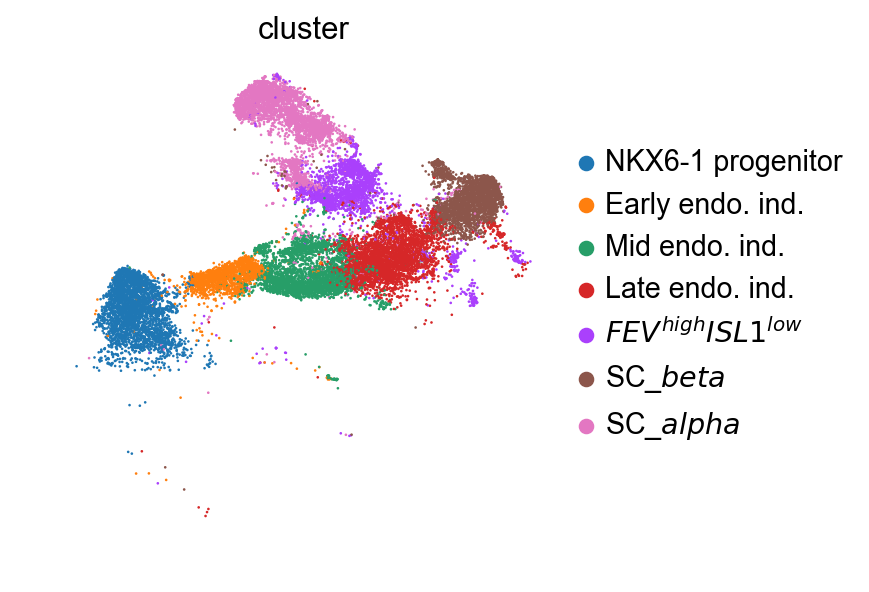

In [10]:
sc.pl.tsne(veres_sub,color=['cluster'],wspace=0.4)

In [11]:
veres_sub.obs['cluster_violin'] = veres_sub.obs['cluster'].copy()


In [12]:
veres_sub.obs['cluster_violin'].cat.rename_categories(
    ['NKX6-1\nprogenitor', 'Early\nendo. ind.', 'Mid\nendo. ind.','Late\nendo. ind.','$FEV^{high}$\n$ISL1^{low}$','SC_$beta$', 'SC_$alpha$'], inplace=True
)

## Figure S1 - Syt family members

In [13]:
[k for k in veres_sub.var_names if k.startswith('SYT')]

['SYT1',
 'SYT10',
 'SYT11',
 'SYT13',
 'SYT14',
 'SYT15',
 'SYT16',
 'SYT17',
 'SYT2',
 'SYT3',
 'SYT4',
 'SYT5',
 'SYT6',
 'SYT7',
 'SYT8',
 'SYT9',
 'SYTL1',
 'SYTL2',
 'SYTL3',
 'SYTL4',
 'SYTL5']

In [14]:
syt_family =['SYT1', 'SYT2', 'SYT3', 'SYT4', 'SYT5', 'SYT6', 'SYT7', 'SYT8', 'SYT9',
             'SYT10', 'SYT11', 'SYT13', 'SYT14', 'SYT15', 'SYT16', 'SYT17']

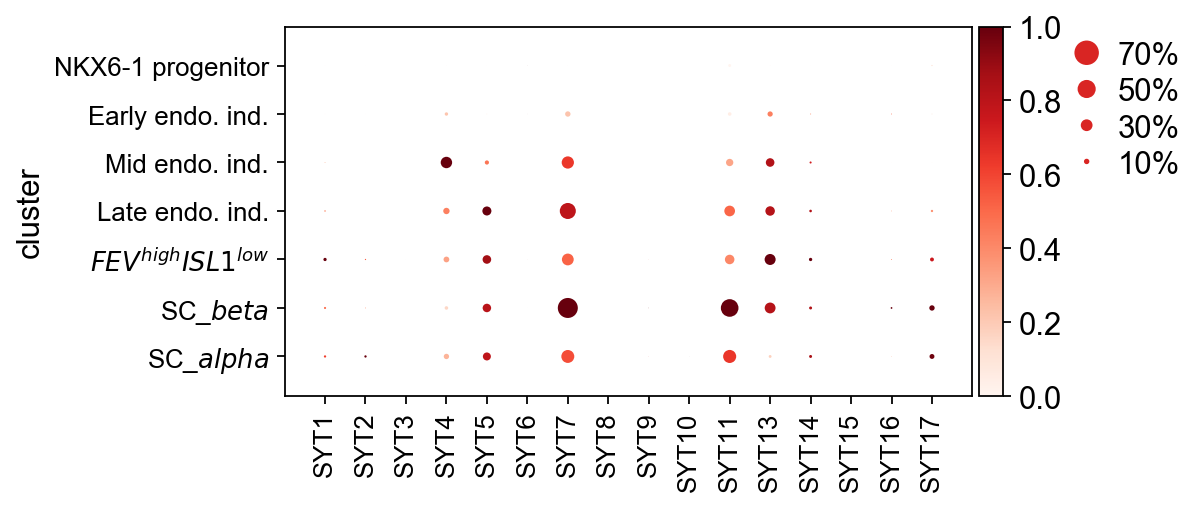

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[5.6, 0, 0.2, 0.5, 0.25])

In [15]:
sc.pl.dotplot(veres_sub, groupby='cluster', var_names=syt_family, standard_scale='var', save='_Fig_S1b.pdf')